In [1]:
import math

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from tensorflow_datasets import load as tfds
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import numpy as np

from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist

# Load dataset from sklearn

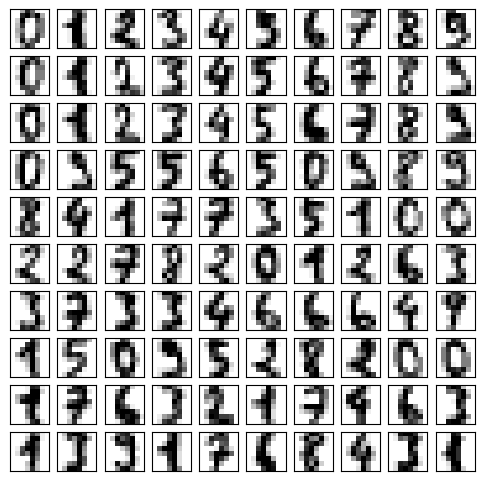

In [2]:
digits_load = load_digits(n_class=10)

digits_img = digits_load.images / 16
X = digits_load.data / 16
y = digits_load.target

fig, ax = plt.subplots(10, 10, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits_img[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

## Data visualization

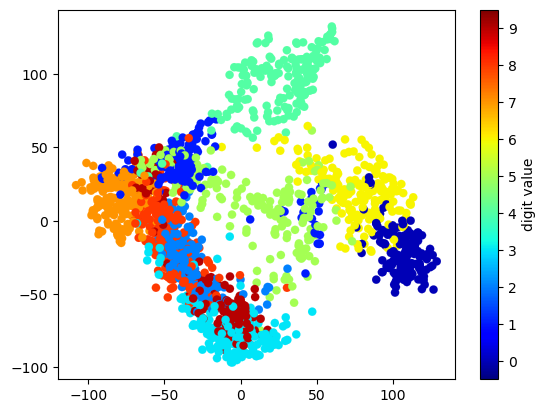

In [3]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=10, n_neighbors=10)
projection = iso.fit_transform(digits_load.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=y, cmap='jet')
plt.colorbar(ticks=range(11), label='digit value')
plt.clim(-0.5, 9.5)

## Reshape data from 1, 64 to 8, 8

In [4]:
X = X.reshape(1797, 8, 8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Model

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(8, 8, 1), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, verbose=0)

model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 485us/step - loss: 0.0826 - accuracy: 0.9800


[0.08255796134471893, 0.9800000190734863]

## Save model to work localy in js with tensorflowjs

In [7]:
model.save('mnist.h5')

/Users/kevin.zarama/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
!pip install tensorflowjs

### Create the model to then import in js code

In [9]:
!tensorflowjs_converter --input_format keras mnist.h5 output

## Import other data to test more pixels data

In [10]:
data, metadata = tfds('mnist', as_supervised=True, with_info=True)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

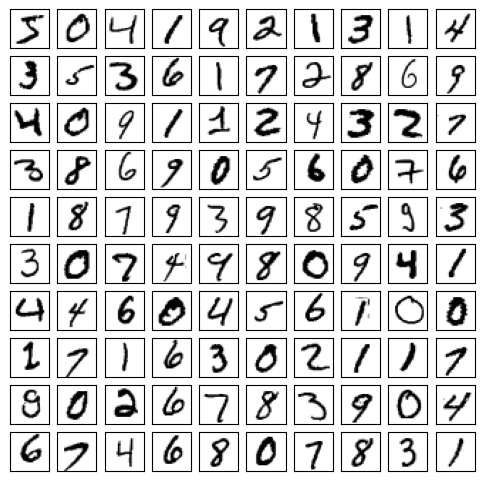

In [11]:
fig, ax = plt.subplots(10, 10, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(50, activation='relu'),
    
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    steps_per_epoch=int(np.ceil(60000 / float(32))), 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1875 - accuracy: 0.9406 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0697 - accuracy: 0.9787 - val_loss: 0.0396 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.0272 - val_accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0267 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0274 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0237 - val_ac

In [14]:
model.save('mnist.h5')

In [15]:
!tensorflowjs_converter --input_format keras mnist.h5 output

## Data augmentation

In [16]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

rango_rotacion = 20
mov_ancho = 0.25
mov_alto = 0.25
rango_inclinacion=25
rango_acercamiento=[0.9,2]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    shear_range=rango_inclinacion
)

datagen.fit(train_images)

data_gen_entrenamiento = datagen.flow(train_images, train_labels, batch_size=60000)

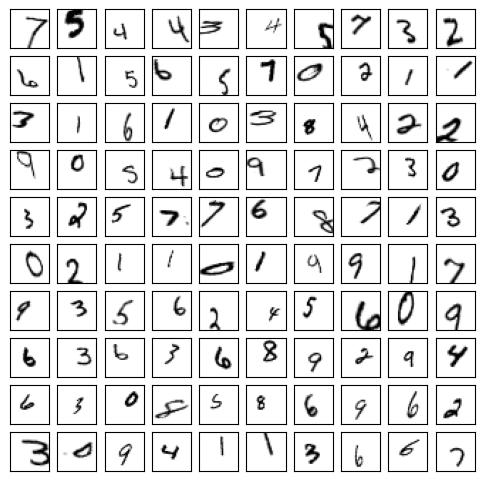

In [17]:
fig, ax = plt.subplots(10, 10, figsize=(6, 6))
reshaped_img = data_gen_entrenamiento[0][0].reshape(60000,28,28)
for i, axi in enumerate(ax.flat):
    axi.imshow(reshaped_img[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [18]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

TAMANO_LOTE = 64
epocas=100

history = model.fit(
    np.concatenate((data_gen_entrenamiento[0][0], train_images)),
    np.concatenate((data_gen_entrenamiento[0][1], train_labels)),
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(test_images, test_labels)
)

Epoch 1/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3522 - accuracy: 0.8901 - val_loss: 0.0279 - val_accuracy: 0.9909
Epoch 2/100
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1954 - accuracy: 0.9391 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 3/100
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1579 - accuracy: 0.9498 - val_loss: 0.0241 - val_accuracy: 0.9929
Epoch 4/100
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1386 - accuracy: 0.9559 - val_loss: 0.0200 - val_accuracy: 0.9934
Epoch 5/100
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1263 - accuracy: 0.9597 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 6/100
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1189 - accuracy: 0.9623 - val_loss: 0.0216 - val_accuracy: 0.9932
Epoch 7/100
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1100 - accuracy: 0.9650 - val_loss: 0

1875/1875 [==============================] - 40s 21ms/step - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.0250 - val_accuracy: 0.9942
Epoch 57/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0520 - accuracy: 0.9826 - val_loss: 0.0220 - val_accuracy: 0.9940
Epoch 58/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0516 - accuracy: 0.9824 - val_loss: 0.0264 - val_accuracy: 0.9933
Epoch 59/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0495 - accuracy: 0.9833 - val_loss: 0.0232 - val_accuracy: 0.9940
Epoch 60/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0512 - accuracy: 0.9827 - val_loss: 0.0213 - val_accuracy: 0.9945
Epoch 61/100
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0501 - accuracy: 0.9835 - val_loss: 0.0228 - val_accuracy: 0.9946
Epoch 62/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0502 - accuracy: 0.9833 - val_loss: 0.0236 

In [19]:
model.save('mnist.h5')

In [20]:
!tensorflowjs_converter --input_format keras mnist.h5 output